# **IS 445 - Project Part II**

### **Dataset:** Beijing past 120 months daily average AQI (Air Quality Index)


---


This dataset consolidates the daily air quality metrics for Beijing, covering the timeframe from dates:
January 1, 2014 - December 3, 2023.



---





*  It provides granular detail on concentrations of key pollutants, including PM2.5, PM10, nitrogen dioxide (NO2), sulfur dioxide (SO2), and carbon monoxide (CO), which are instrumental in calculating the daily Air Quality Index (AQI) values.
* Particulate Matter (PM), which includes PM2.5 (2.5 micrometers or smaller) and PM10 (10 micrometers or smaller), refers to tiny particles or droplets in the air.
*   PM2.5 is finer and PM10 is larger, with PM2.5 being potentially more harmful to health.
*   This data enables an in-depth analysis of air pollution trends, offering insights into environmental changes and the impact of policy measures over the past decade.


---




## **Preprocessing and exploring:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# load csv
df = pd.read_csv("/content/drive/MyDrive/2023Fall/DV/beijing-air-quality.csv")
df

,date,pm25,pm10,o3,no2,so2,co
0,2023/11/2,211,102,34,11,1,6
1,2023/11/3,142,38,17,8,1,1
2,2023/11/4,24,65,16,20,1,4
3,2023/11/5,77,46,23,14,,3
4,2023/11/6,68,43,22,4,,1
...,...,...,...,...,...,...,...
3599,2019/1/1,,46,17,20,5,9
3600,2017/9/11,,23,35,19,1,3
3601,2015/1/1,,67,19,29,16,11
3602,2014/1/1,,85,20,30,14,20


**Data before cleaning:**


---



> Total number of Rows / Dates  :  3617

> Total number of Columns       :  7


---



In [3]:
# Get the column names and types

print("Column Names:", df.columns, "\n")
print("Data Types:", df.dtypes)

Column Names: Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object') 

Data Types: date     object
 pm25    object
 pm10    object
 o3      object
 no2     object
 so2     object
 co      object
dtype: object


###**To Do:**


---


*   Remove spaces and any other non-standard characters in the column names to ensure consistency.

*   Convert the data types of the columns to the appropriate data types, specifically:
    *   Convert 'date' column to datetime for better date-time manipulation.
    *   Convert pollutant measurement columns to float to enable numerical analysis.


*   Perform a thorough check for null values:
   *   Skim through the CSV file to identify patterns or inconsistencies in the data leading to null values.
   *   Decide on a strategy for handling these null values.
*   Ensure all data types are correctly assigned, as this is crucial for subsequent data analysis and visualization tasks.



---

**Renaming the columns to get rid of the blank spaces:**



In [4]:
new_column_names = {
    'date': 'date',
    ' pm25': 'pm25',
    ' pm10': 'pm10',
    ' o3': 'o3',
    ' no2': 'no2',
    ' so2': 'so2',
    ' co': 'co'
}

# rename
df.rename(columns=new_column_names, inplace=True)

# updated column names
print("Updated Column Names:")
print(df.columns)



Updated Column Names:
Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')


**Converting the 'date' column to datetime in order to sort the dataset in datetime:**



In [5]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# sort by date
df.sort_values(by='date', inplace=True)

df

,date,pm25,pm10,o3,no2,so2,co
3602,2014-01-01,,85,20,30,14,20
3508,2014-01-02,125,136,4,44,45,39
3509,2014-01-03,218,79,22,20,15,22
3510,2014-01-04,127,109,3,37,26,32
3511,2014-01-05,213,74,16,32,23,24
...,...,...,...,...,...,...,...
14,2023-11-16,130,32,25,4,,1
15,2023-11-17,23,22,24,4,,3
16,2023-11-18,24,41,16,20,1,4
17,2023-11-19,68,59,,32,1,8


**Converting 'object' type to 'numeric' type:**

In [6]:
# converting object types to numeric types

df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
df['o3'] = pd.to_numeric(df['o3'], errors='coerce')
df['no2'] = pd.to_numeric(df['no2'], errors='coerce')
df['so2'] = pd.to_numeric(df['so2'], errors='coerce')
df['co'] = pd.to_numeric(df['co'], errors='coerce')

print(df.dtypes)


date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object


In [7]:
df.head()

,date,pm25,pm10,o3,no2,so2,co
3602,2014-01-01,NaN,85.0,20.0,30.0,14.0,20.0
3508,2014-01-02,125.0,136.0,4.0,44.0,45.0,39.0
3509,2014-01-03,218.0,79.0,22.0,20.0,15.0,22.0
3510,2014-01-04,127.0,109.0,3.0,37.0,26.0,32.0
3511,2014-01-05,213.0,74.0,16.0,32.0,23.0,24.0


In [8]:
df.describe()

,pm25,pm10,o3,no2,so2,co
count,3598.000000,3555.000000,3587.000000,3598.000000,2765.000000,3594.000000
mean,112.923847,63.929677,44.812657,19.372985,4.886076,7.668614
std,64.250178,49.733896,32.084680,11.294396,7.358779,7.139154
min,10.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,36.000000,23.000000,11.000000,1.000000,4.000000
50%,104.000000,55.000000,34.000000,17.000000,2.000000,6.000000
75%,150.000000,77.000000,62.500000,25.000000,5.000000,9.000000
max,525.000000,886.000000,175.000000,90.000000,71.000000,78.000000


### **Descriptive Statistics Analysis:**



---

> The dataset encompasses an extensive period from January 1, 2014, to December 3, 2023, with 3,617 daily records out of a possible 3,623 days, indicating that data collection is nearly complete with a 99.83% capture rate.

> * Count Variations: Some missing values are noted, with SO2 having fewer observations. This could affect the robustness of average calculations and other statistics.

> * Average Levels: PM25 and PM10 have the highest mean concentrations, indicating a potential concern for particulate matter pollution. These pollutants can have significant health impacts, especially PM25, which can penetrate deep into the lungs.

> * Variability: The standard deviation is high for PM25 and PM10, pointing to daily fluctuations in their levels. These variations could be influenced by multiple factors such as weather conditions, economic activity, and emission controls.

> * Range: The minimum and maximum values show a broad spread of pollution levels, with peak values for PM25 and PM10 suggesting occasional very poor air quality days.

> * Quartiles: The 25%, 50% (median), and 75% values demonstrate that half of the observed days fall within a moderate to potentially unhealthy range for PM25, highlighting a regular exposure to higher pollution levels.

> * Outliers: Using the IQR, outliers would be days with extremely low or high pollution levels, which may be linked to specific environmental events or anomalies in data collection.


> In conclusion, the data indicates a higher prevalence and variability of particulate matter in the air, with occasional spikes that could impact public health. These insights could guide targeted actions to mitigate pollution sources and protect vulnerable populations on days with high pollution levels.




---















In [9]:
# Calculate the total number of entries in the DataFrame

total_entries = len(df)
non_missing_entries = df.notnull().sum()
non_missing_percentage = (non_missing_entries / total_entries) * 100
print(non_missing_percentage)


date    100.000000
pm25     99.833518
pm10     98.640400
o3       99.528302
no2      99.833518
so2      76.720311
co       99.722531
dtype: float64



### **Non-null entries Analysis:**


---


*   The pollutant 'PM25', 'PM10', 'O3', 'NO2', 'CO' show high data completeness, ranging from 98.65% to 99.83% non-null data.
*   The 'SO2' column has a relatively lower data completeness of 76.75% compared to other pollutants.




---





# Plotting

### **Outliers:**

In [10]:
columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
total_counts = {'pm25': 3611, 'pm10': 3568, 'o3': 3601, 'no2': 3611, 'so2': 2776, 'co': 3607}


def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outlier_data = {}
for column in columns:
    outliers = detect_outliers(column)
    outlier_data[column] = outliers
    num_outliers = len(outliers)
    percentage_of_outliers = (num_outliers / total_counts[column]) * 100
    print(f"Number of outlier rows for {column}: {num_outliers} \n {percentage_of_outliers:.2f}% of {column} entries \n")

Number of outlier rows for pm25: 80 
 2.22% of pm25 entries 

Number of outlier rows for pm10: 162 
 4.54% of pm10 entries 

Number of outlier rows for o3: 96 
 2.67% of o3 entries 

Number of outlier rows for no2: 108 
 2.99% of no2 entries 

Number of outlier rows for so2: 264 
 9.51% of so2 entries 

Number of outlier rows for co: 280 
 7.76% of co entries 



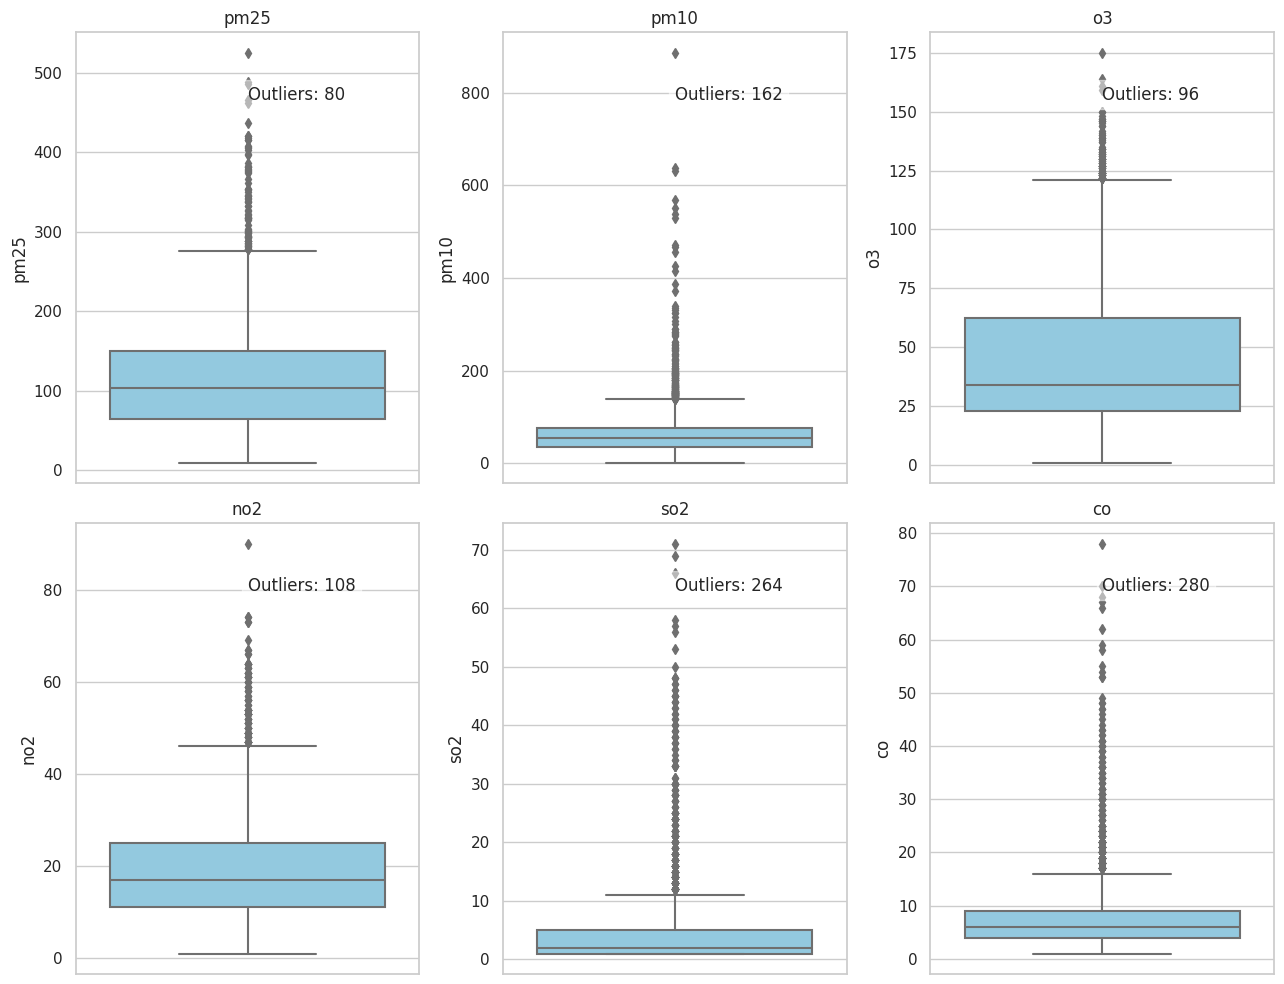

In [11]:
#boxplot for outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 10))
sns.set(style="whitegrid")

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column], orient='v', color='skyblue')
    outliers = detect_outliers(column)
    num_outliers = len(outliers)
    plt.text(0.5, 0.85, f"Outliers: {num_outliers}", transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    plt.title(column)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()


### **Outlier Analysis:**

The analysis of outliers offers crucial insight
s into the prevalence of extreme pollution events. Outliers are defined as values that lie beyond 1.5 times the interquartile range above the third quartile or below the first quartile. They represent measurements that significantly deviate from the typical pollution levels.


> **PM2.5:** 2.22% outlier measurements suggest occasional but severe spikes in fine particulate pollution, likely from combustion sources or adverse meteorological conditions.

> **PM10:** With 4.54% outliers, these data points suggest that Beijing experiences more frequent extreme levels of coarser particles, possibly due to dust, construction, or industrial activities.


> **O3:** 2.42% outliers in ozone levels could correspond to days with intense sunlight and stagnant air, conditions that enhance O3 formation, impacting urban air quality.



> **NO2:** The 2.99% outliers for nitrogen dioxide indicate periodic and possibly localized events of high NO2, often related to traffic congestion and industrial emissions.

> **SO2:** The high number of SO2 outliers (9.51%) highlights the potential for sporadic, significantly elevated levels, potentially from coal burning or industrial processes.

> **CO:** 6.21% outlier readings for carbon monoxide imply instances of notably poor combustion efficiency, likely from heating systems, vehicles, or industrial activities in the city.








### **Outliers (Different plot):**


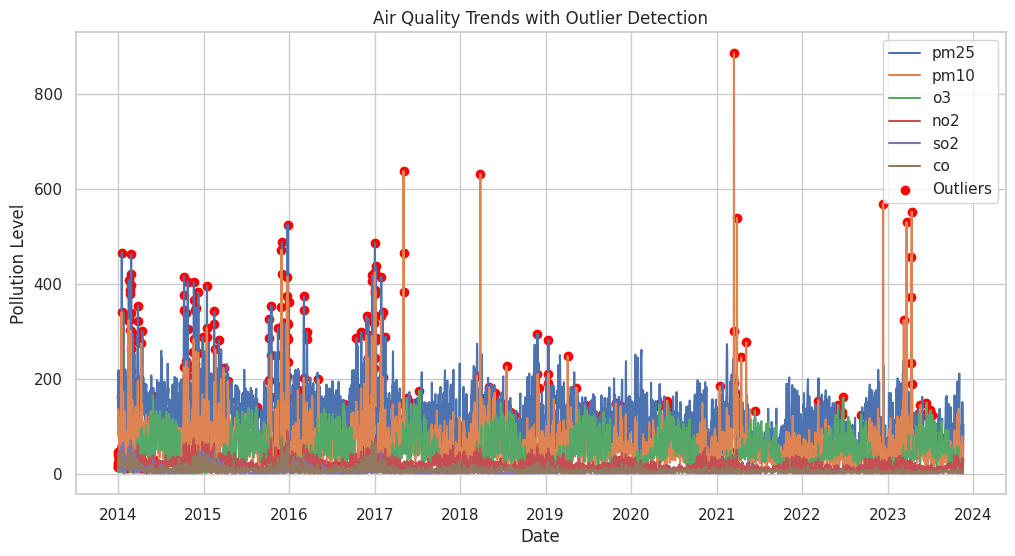

In [12]:
# define a function to detect outliers based on IQR

def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of columns to check for outliers
columns_to_check = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Lists to store outlier dates and values for each column
outlier_dates = []
outlier_values = []

# Detect outliers for each column and store the data
for column in columns_to_check:
    outliers = detect_outliers(column)
    outlier_dates.extend(outliers['date'])
    outlier_values.extend(outliers[column])
plt.figure(figsize=(12, 6))
for column in columns_to_check:
    plt.plot(df['date'], df[column], label=column)

plt.scatter(outlier_dates, outlier_values, color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Air Quality Trends with Outlier Detection')
plt.legend()
plt.show()




### **API**

**Fetching data from API and added refresh button and time:**

In [42]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from datetime import datetime

# fetch data from the API
def fetch_data(api_url):
    response = requests.get(api_url)
    data = response.json()
    return data

# update and display the chart
def update_chart(api_url, out):
    data = fetch_data(api_url)

    # extract relevant data
    time_series = pd.to_datetime(data['data']['time']['s'])
    pollutants = data['data']['iaqi']
    time_zone = data['data']['time']['tz']  # Extract time zone information

    # select pollutants
    selected_pollutants = ["pm25", "pm10", "no2", "co", "so2", "o3"]
    pollutants = {pollutant: pollutants.get(pollutant, {"v": 0})["v"] for pollutant in selected_pollutants}

    df = pd.DataFrame(pollutants.values(), index=pollutants.keys(), columns=["Concentration"])

    # Get the last refresh time
    last_refresh_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    return df, data['data']['city']['name'], time_series, last_refresh_time, time_zone

# API URL
beijing_api_url = "https://api.waqi.info/feed/beijing/?token=f4edd4abb0847e9970cbb651a257aeef2abf68ef"

# display chart
out = widgets.Output()
display(out)

# plotting
def plot_chart(b):
    with out:
        clear_output(wait=True)
        df, city_name, time_series, last_refresh_time, time_zone = update_chart(beijing_api_url, out)

        plt.figure(figsize=(10, 6))
        df.plot(kind='bar', legend=False)
        plt.title(f"Pollutant Levels in Beijing on {time_series} ({time_zone}) (Last Refresh: {last_refresh_time})")
        plt.xlabel("Pollutants")
        plt.ylabel("Concentration (µg/m³)")
        plt.show()

# refresh button
button = widgets.Button(description="Refresh Data")
button.on_click(plot_chart)

display(button)

# initial plot
plot_chart(None)

Output()

Button(description='Refresh Data', style=ButtonStyle())

### **Simple Interactions:**



In [14]:
import requests
import pandas as pd
import plotly.express as px
from IPython.display import clear_output

# fetch data from the API
def fetch_data(api_url):
    response = requests.get(api_url)
    data = response.json()
    return data

# update
def update_chart(api_url):
    data = fetch_data(api_url)

    # extract data
    time_series = pd.to_datetime(data['data']['time']['s'])
    pollutants = data['data']['iaqi']

    # select pollutants
    selected_pollutants = ["pm25", "pm10", "no2", "co", "so2", "o3"]
    pollutants = {pollutant: pollutants.get(pollutant, {"v": 0})["v"] for pollutant in selected_pollutants}

    df = pd.DataFrame(pollutants.values(), index=pollutants.keys(), columns=["Concentration"])

    # plotting (Plotly)
    fig = px.bar(df, x=df.index, y="Concentration", labels={'index': 'Pollutants', 'Concentration': 'Concentration (µg/m³)'},
                 title=f"Pollutant Levels in {data['data']['city']['name']} on {time_series}")

    fig.show()

# API URL for Beijing
beijing_api_url = "https://api.waqi.info/feed/beijing/?token=f4edd4abb0847e9970cbb651a257aeef2abf68ef"

# display initial chart
update_chart(beijing_api_url)


### **Map Tile API:**

In [15]:
!pip install folium
import requests
import folium

# Define the API URL
beijing_api_url = "https://api.waqi.info/feed/beijing/?token=f4edd4abb0847e9970cbb651a257aeef2abf68ef"

# Fetch data from the API
response = requests.get(beijing_api_url)
data = response.json()

# Extract relevant information
latitude = data['data']['city']['geo'][0]
longitude = data['data']['city']['geo'][1]
aqi_marker = 'usepa-aqi'

# Create a map centered around Beijing
m = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add the tile layer
tile_url = f'https://tiles.aqicn.org/tiles/{aqi_marker}/{{z}}/{{x}}/{{y}}.png'
folium.TileLayer(tile_url, attr='Air Quality Index').add_to(m)

# Display the map
m

### **Widget API:**

In [16]:
import requests
from IPython.display import HTML

# fetch data from the API
def get_beijing_aqi_data(api_url):
    response = requests.get(api_url)
    data = response.json()
    return data

# generate the HTML for the widget
def display_aqi_widget(data):
    cityname = data['data']['city']['name']
    aqi = data['data']['aqi']
    date = data['data']['time']['s']

    # if 'category' is not available in the 'pm10' forecast
    try:
        impact = data['data']['forecast']['daily']['pm10'][0]['category']['en']
    except KeyError:
        impact = "Unknown"

    attribution = data['data']['attributions'][0]['name']
    details = f"{cityname} Air Quality.\nAQI: {aqi}\nImpact: {impact}\nUpdated on {date}"

    html_code = """
    <div style='background-color: #ffde33; padding: 10px; border-radius: 5px;'>
        <strong>{cityname} Air Quality</strong> is <span style='font-weight: bold;'>{impact}</span>.
        <br>
        AQI: {aqi} on {date}
        <br>
        Provided by {attribution}
        <br>
        Details: {details}
    </div>
    """
    return html_code.format(cityname=cityname, aqi=aqi, date=date, impact=impact, attribution=attribution, details=details)

# API data
beijing_api_url = "https://api.waqi.info/feed/beijing/?token=f4edd4abb0847e9970cbb651a257aeef2abf68ef"
beijing_data = get_beijing_aqi_data(beijing_api_url)

widget_html = display_aqi_widget(beijing_data)

# display
HTML(widget_html)


### **Sample Data (without API but shows the category):**

In [17]:
from IPython.display import HTML

# generate the HTML for the widget
def display_aqi_widget(cityname, aqi, date, impact, attribution, details):
    html_code = """
    <div style='background-color: #ffde33; padding: 10px; border-radius: 5px;'>
        <strong>{cityname} Air Quality</strong> is <span style='font-weight: bold;'>{impact}</span>.
        <br>
        AQI: {aqi} on {date}
        <br>
        Provided by {attribution}
        <br>
        Details: {details}
    </div>
    """
    return html_code.format(cityname=cityname, aqi=aqi, date=date, impact=impact, attribution=attribution, details=details)

# example data
city_name = "Beijing"
aqi_value = 38
update_date = "Sunday 7:00"
health_impact = "Good"
data_attribution = "Beijing Environmental Protection Monitoring Center"
aqi_details = "Beijing Air Quality.\n38\nGood\nUpdated on Sunday 7:00"

widget_html = display_aqi_widget(city_name, aqi_value, update_date, health_impact, data_attribution, aqi_details)

# display
HTML(widget_html)

### **Time Series Trends of Air Quality Parameters:**

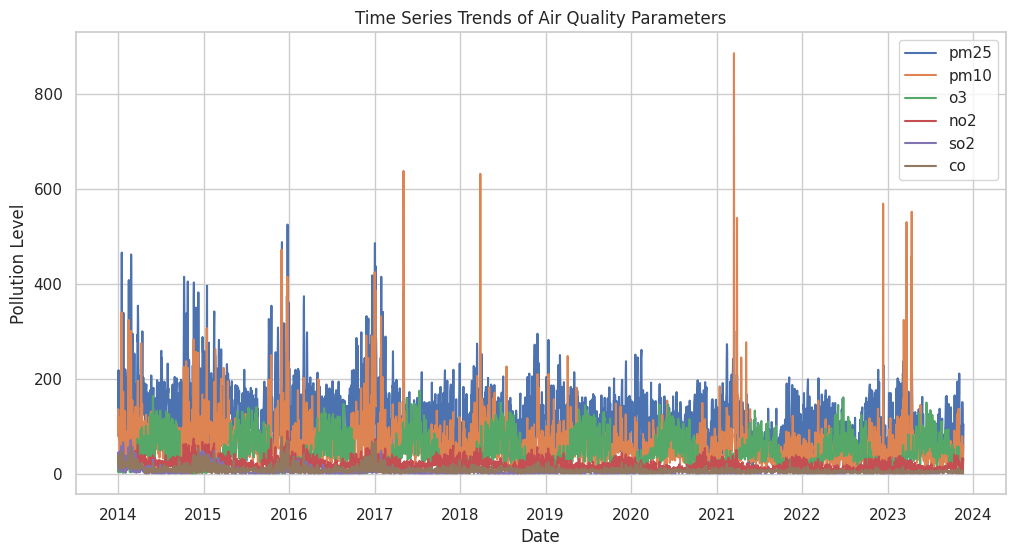

In [18]:
# plotting all the pollutants' Trends Over Time

plt.figure(figsize=(12, 6))
for column in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    plt.plot(df['date'], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Time Series Trends of Air Quality Parameters')
plt.legend()
plt.show()

### **PM2.5 and PM10 Trends Over Time:**

It turns out better after changing the data types but kind of hard to read the data.

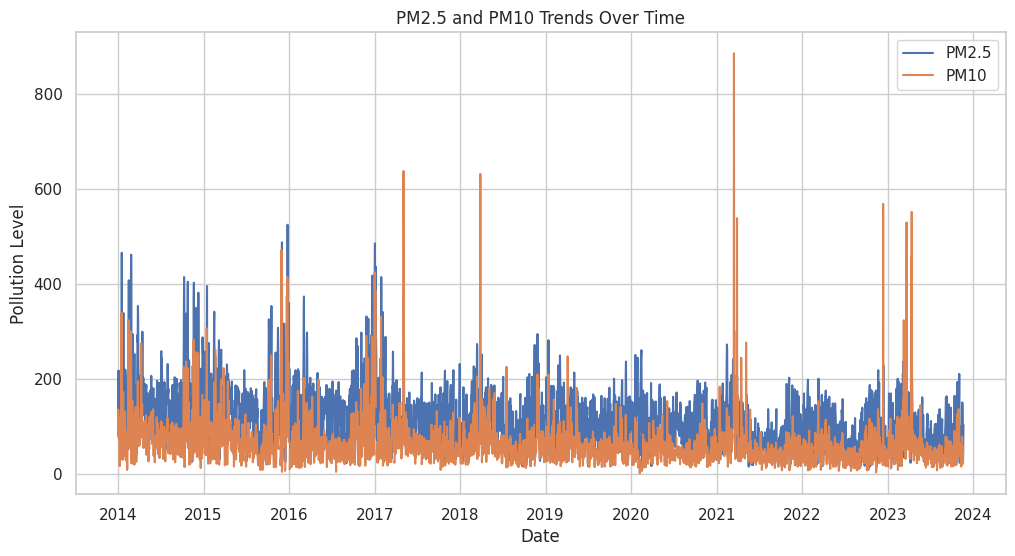

In [19]:
# plotting PM2.5 and PM10 Trends Over Time

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['pm25'], label='PM2.5')
plt.plot(df['date'], df['pm10'], label='PM10')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('PM2.5 and PM10 Trends Over Time')
plt.legend()
plt.show()

### **PM2.5 and PM10 Trends Over Time within 2023:**

The first plot looks kind of squezzed up, so I decidied to set a time range.

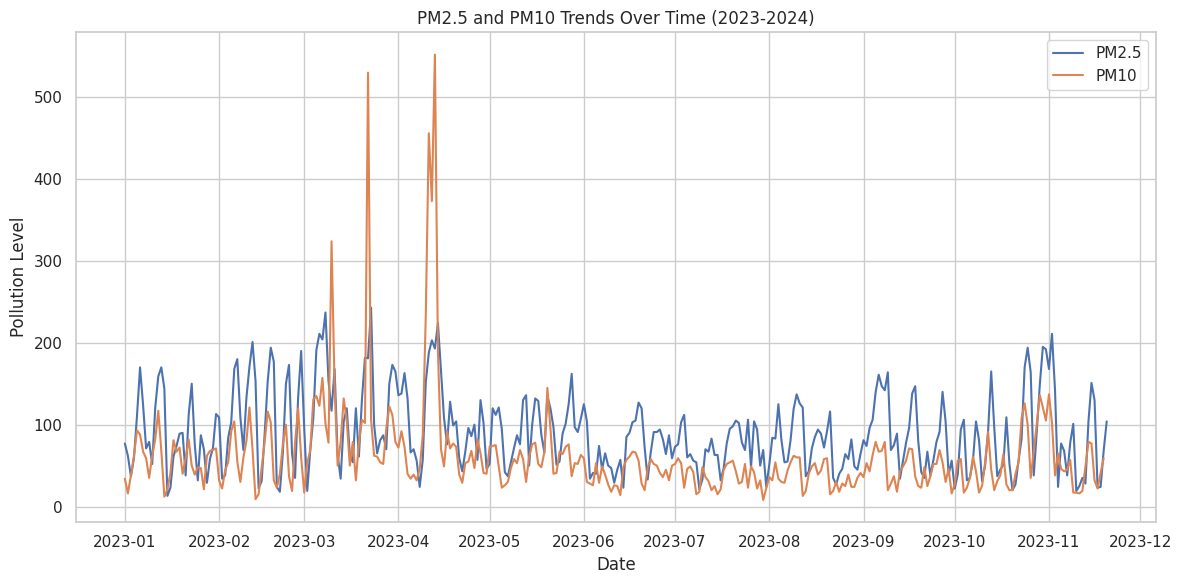

In [20]:
# set time range 2023
start_date = '2023-01-01'
end_date = '2023-12-31'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['date'], filtered_df['pm25'], label='PM2.5')
plt.plot(filtered_df['date'], filtered_df['pm10'], label='PM10')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('PM2.5 and PM10 Trends Over Time (2023-2024)')
plt.legend()
plt.tight_layout()
plt.show()

### **PM2.5 and PM10 Trends Over Time within 2022:**

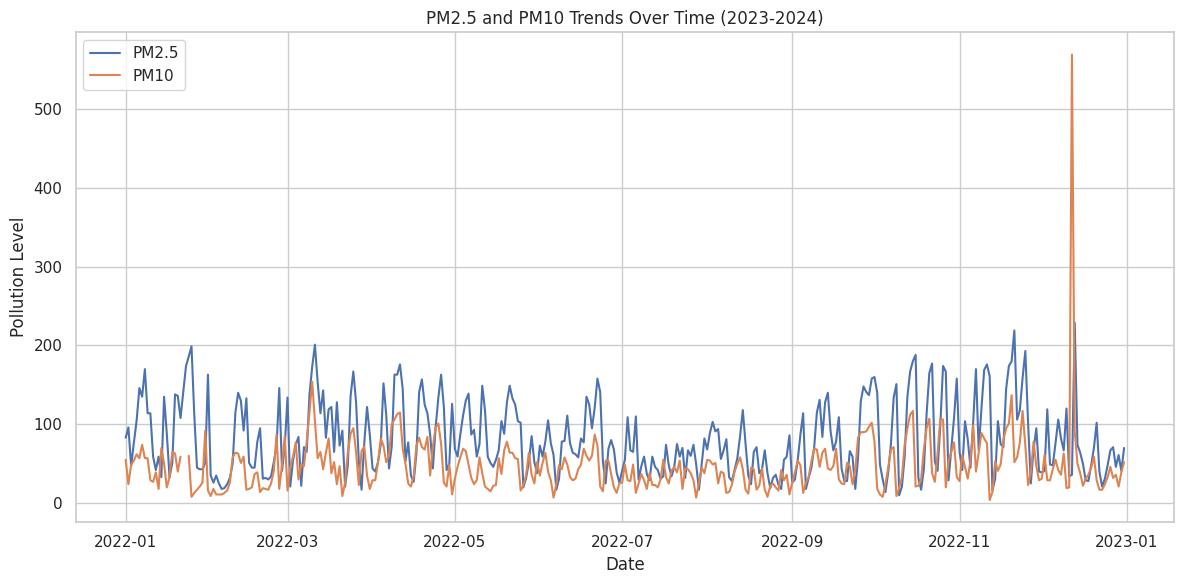

In [21]:
# set time range 2022
start_date = '2022-01-01'
end_date = '2022-12-31'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# plot
plt.figure(figsize=(12,6))
plt.plot(filtered_df['date'], filtered_df['pm25'], label='PM2.5')
plt.plot(filtered_df['date'], filtered_df['pm10'], label='PM10')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('PM2.5 and PM10 Trends Over Time (2023-2024)')
plt.legend()
plt.tight_layout()
plt.show()

### **Finding out the correlations between pollutants:**

In [22]:
correlation_matrix = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].corr()
print(correlation_matrix)

          pm25      pm10        o3       no2       so2        co
pm25  1.000000  0.483436 -0.041653  0.401985  0.336202  0.541353
pm10  0.483436  1.000000 -0.033821  0.562660  0.409519  0.583675
o3   -0.041653 -0.033821  1.000000 -0.232715 -0.191319 -0.170022
no2   0.401985  0.562660 -0.232715  1.000000  0.555767  0.758784
so2   0.336202  0.409519 -0.191319  0.555767  1.000000  0.681694
co    0.541353  0.583675 -0.170022  0.758784  0.681694  1.000000


### **Heatmap of Air Quality Parameters:**

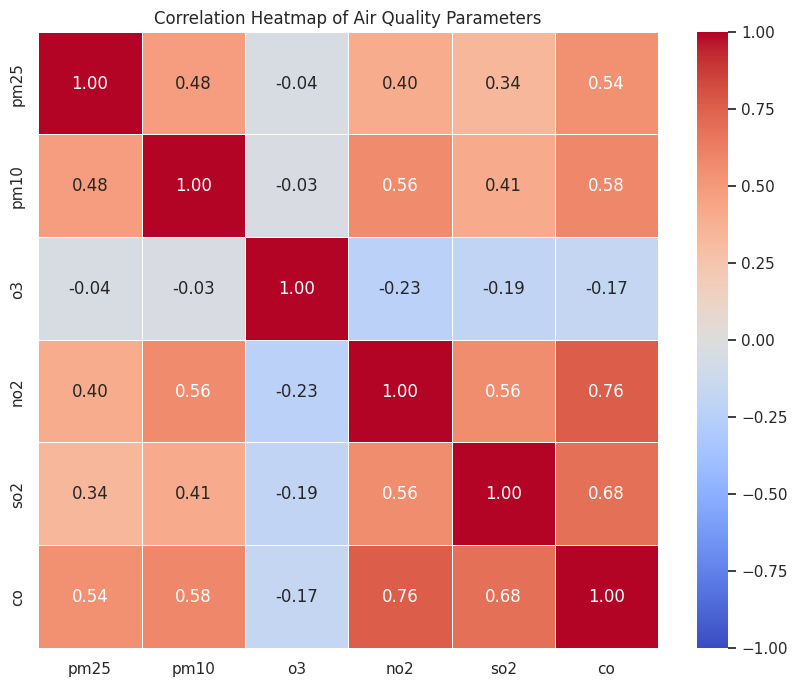

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].corr()

plt.title('Correlation Heatmap of Air Quality Parameters')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

plt.show()


### **Heatmap of Air Quality Parameters (2022):**

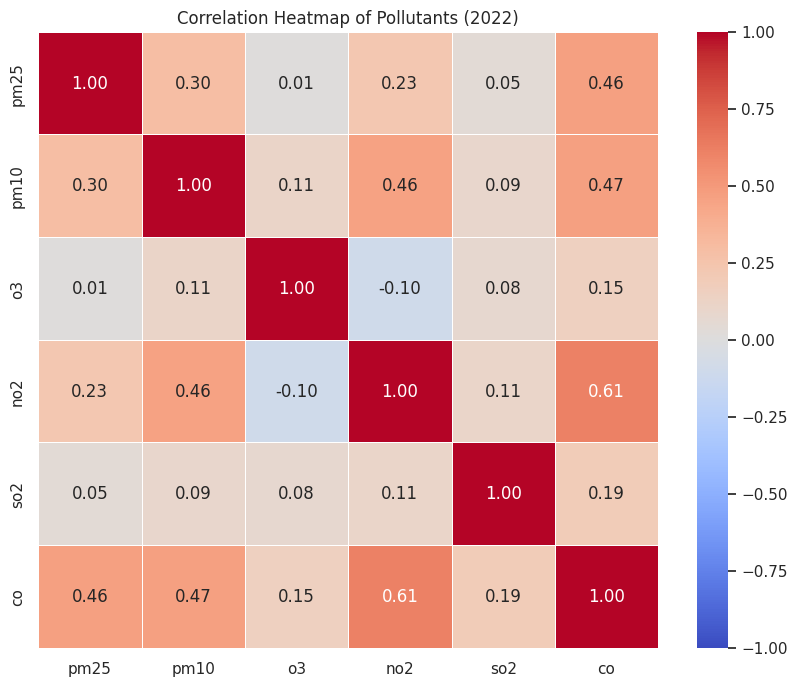

In [24]:
import seaborn as sns

# set time range
start_date = '2022-01-01'
end_date = '2022-12-31'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# create a correlation matrix
correlation_matrix = filtered_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Pollutants (2022)')
plt.show()

### **Seasonal and Monthly Patterns and informations:**

In [25]:
max_values = df[df['pm25'] == df['pm25'].max()]
min_values = df[df['pm25'] == df['pm25'].min()]

print("Date with highest PM2.5 level:", max_values['date'].values[0])
print("Date with lowest PM2.5 level:", min_values['date'].values[0])

Date with highest PM2.5 level: 2015-12-26T00:00:00.000000000
Date with lowest PM2.5 level: 2022-10-10T00:00:00.000000000


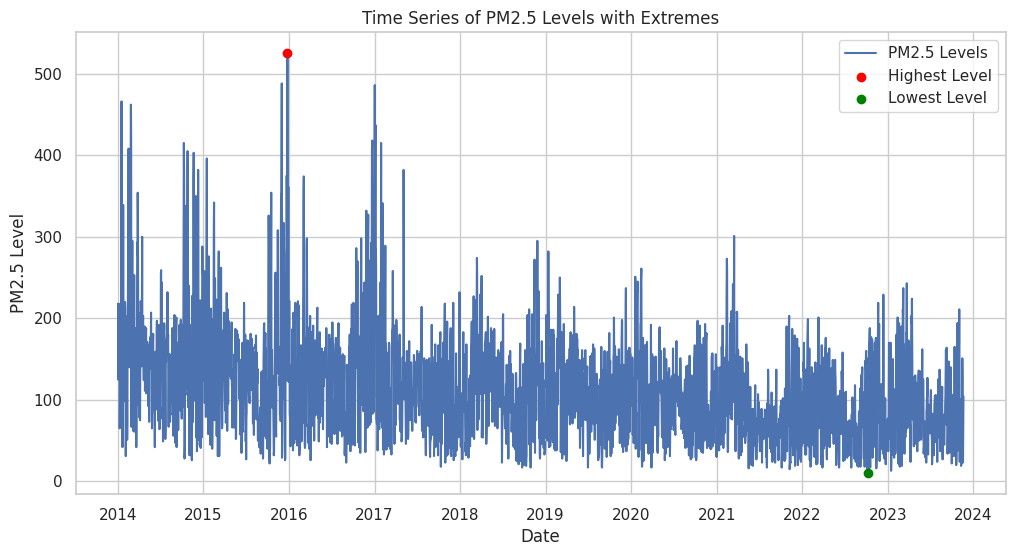

In [26]:
# A look on the time line

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['pm25'], label='PM2.5 Levels')
plt.scatter(max_values['date'], max_values['pm25'], color='red', label='Highest Level', zorder=5)
plt.scatter(min_values['date'], min_values['pm25'], color='green', label='Lowest Level', zorder=5)

plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.title('Time Series of PM2.5 Levels with Extremes')
plt.legend()
plt.show()

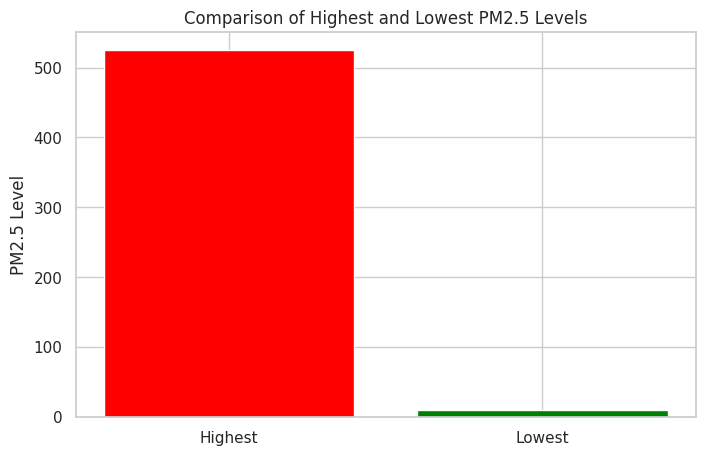

In [27]:
# Compatison of the highest and lowest pm2.5 Level

plt.figure(figsize=(8, 5))
plt.bar(['Highest', 'Lowest'], [max_values['pm25'].values[0], min_values['pm25'].values[0]], color=['red', 'green'])
plt.ylabel('PM2.5 Level')
plt.title('Comparison of Highest and Lowest PM2.5 Levels')
plt.show()

### **Uncover recurring patterns and variations across different months:**

In [28]:
df['month'] = df['date'].dt.month
average_by_month = df.groupby('month').mean()[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
print(average_by_month)

             pm25       pm10         o3        no2       so2         co
month                                                                  
1      124.713816  67.880399  18.389610  23.389610  9.480427  11.191558
2      122.851064  62.327206  26.273050  19.063830  8.942623   9.213523
3      130.932258  84.230263  34.132258  22.051613  7.089494   8.119355
4      121.033333  78.030000  49.370000  18.056667  4.266376   5.491582
5      113.893548  69.951613  67.163934  16.367742  3.843621   5.203226
6      102.513333  53.593960  84.810000  14.813333  2.675439   6.153333
7      102.106452  49.578431  76.693548  13.929032  1.948187   6.661290
8       88.306452  44.741100  65.164516  13.596774  2.233161   6.112903
9       93.787162  51.226351  54.057627  18.429054  2.211823   6.334459
10     113.083871  62.883117  25.684039  22.812903  2.417021   6.906452
11     124.627586  72.348754  15.062718  25.038062  4.511111   9.788927
12     118.826087  71.692593  15.454212  25.849817  6.333333  11

<ipython-input-28-44ca43cfbc69>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 1200x600 with 0 Axes>

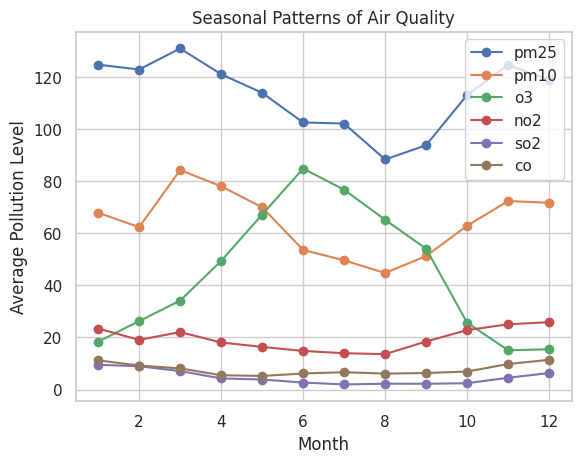

In [29]:
df['month'] = df['date'].dt.month
seasonal_avg = df.groupby('month')[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].mean()

plt.figure(figsize=(12, 6))
seasonal_avg.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Pollution Level')
plt.title('Seasonal Patterns of Air Quality')
plt.legend(loc='upper right')
plt.show()

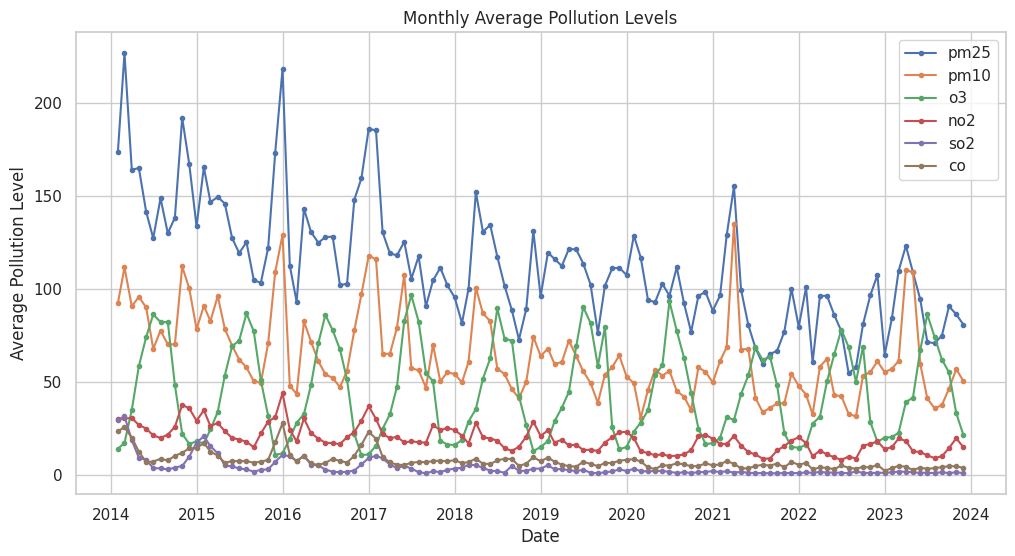

In [30]:
monthly_avg = df.resample('M', on='date').mean()

plt.figure(figsize=(12, 6))
for column in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    plt.plot(monthly_avg.index, monthly_avg[column], label=column, marker=".")

plt.xlabel('Date')
plt.ylabel('Average Pollution Level')
plt.title('Monthly Average Pollution Levels')
plt.legend()
plt.show()

### **Time trend of pollutants by year:**


In [31]:
df['year'] = df['date'].dt.year
average_by_year = df.groupby('year').mean()[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
print(average_by_year)

            pm25       pm10         o3        no2        so2         co
year                                                                   
2014  158.698895  88.091160  46.704420  27.892265  11.875691  13.586592
2015  141.750000  77.966006  45.263736  25.947945   7.695157  11.441096
2016  130.241758  67.994413  44.121212  23.057692   5.484150  10.019231
2017  117.304709  68.667598  44.505650  21.955679   4.200000   8.229917
2018  108.049315  63.944751  44.337912  19.857143   3.417614   7.332418
2019  109.534435  58.162983  47.104972  18.085399   2.716846   6.537190
2020   99.600000  48.599432  44.707650  14.489071   2.082949   5.590164
2021   89.586301  56.986188  39.432877  14.945205   1.398876   5.427397
2022   81.764384  47.730028  43.646575  12.767123   1.347826   4.156164
2023   90.750000  60.894737  48.791925  14.260062   1.453988   4.077399


<ipython-input-31-cf8f9c2d2616>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [32]:
average_by_year.columns

Index(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [33]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Sample data
x = list(average_by_year.index)
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
default_colors = dict(zip(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], default_colors[:6]))

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=['pm25', 'pm10', 'o3', 'no2', 'so2', 'co'],
    value='pm25',
    description='Select pollution:',
)

# Function to update the plot
def update_plot(function):
    plt.clf()  # Clear the current figure
    plt.figure(figsize=(6,4))
    plt.title(f"Time trend of {function} by year")
    plt.plot(x, average_by_year[function], label=function, color=default_colors[function], marker=".")
    plt.xlabel("year")
    plt.ylabel(f"{function} level")
    plt.xticks(average_by_year.index)
    plt.legend()
    plt.show()

# Call update_plot function when the value in the dropdown changes
widgets.interactive(update_plot, function=dropdown)

interactive(children=(Dropdown(description='Select pollution:', options=('pm25', 'pm10', 'o3', 'no2', 'so2', '…

## **Other plots:**

### **Box plot:**

Box plots provide a concise representation of the distribution of data, showcasing the median, quartiles, and any potential outliers. Each box plot offers a visual summary of the spread and variability of pollution levels for a specific parameter.

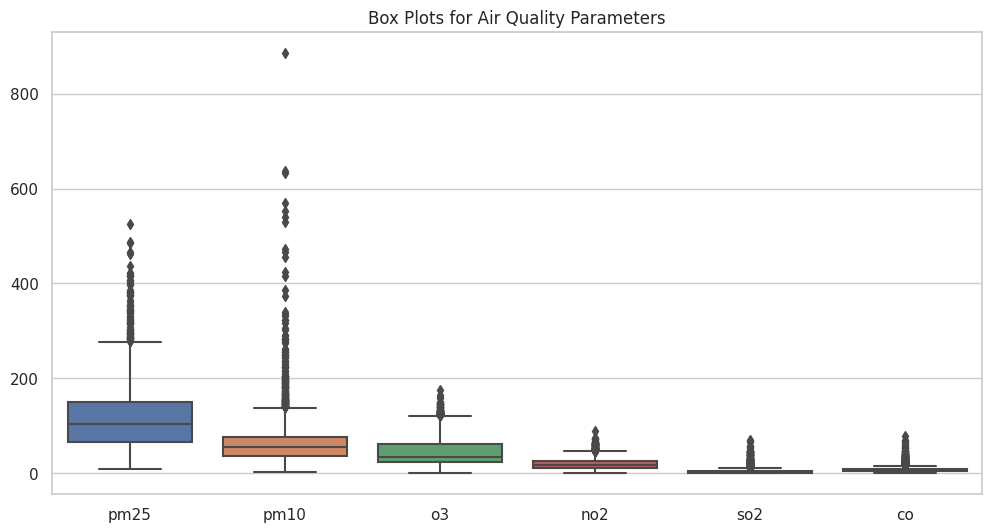

In [34]:
# box plots

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']])
plt.title('Box Plots for Air Quality Parameters')
plt.show()

### **Distribution Histogram:**

Histograms are powerful tools to visualize the distribution of data. Each histogram represents the frequency of pollution levels within specified bins, offering insights into the central tendency, spread, and potential skewness of the data.

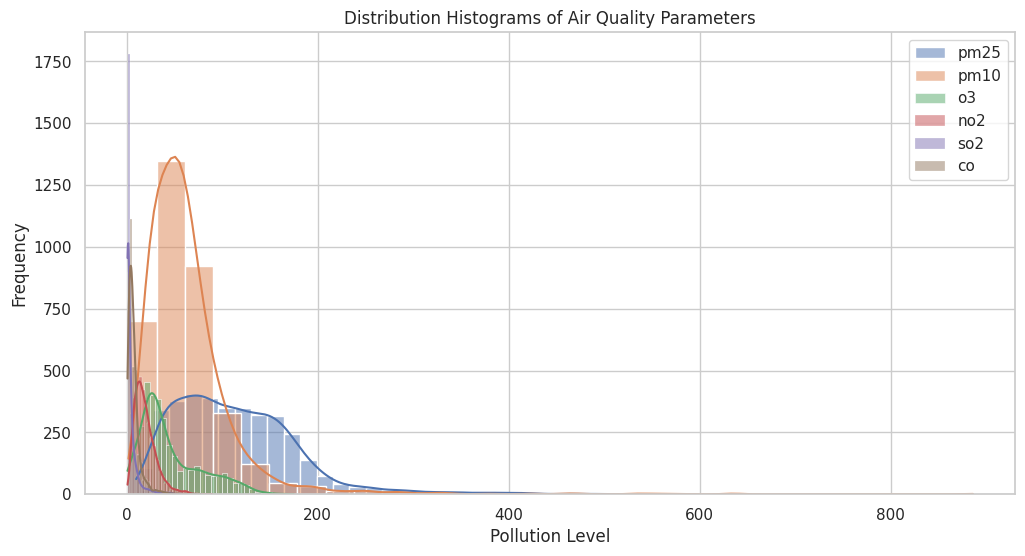

In [35]:
# distribution histogram

plt.figure(figsize=(12, 6))
for column in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    sns.histplot(df[column], bins=30, kde=True, label=column)

plt.xlabel('Pollution Level')
plt.ylabel('Frequency')
plt.title('Distribution Histograms of Air Quality Parameters')
plt.legend()
plt.show()

### **Violin Plots:**

Violin plots combine aspects of box plots and kernel density estimation, providing a holistic view of the distribution of data. Each plot depicts the probability density of different pollution levels, enabling a richer exploration of their variations.

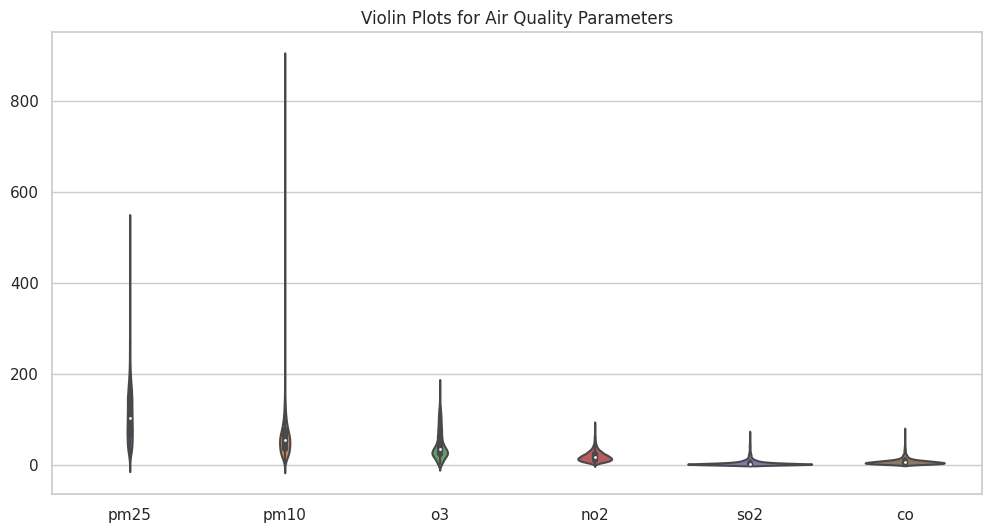

In [36]:
# violin plots

plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']])
plt.title('Violin Plots for Air Quality Parameters')
plt.show()

### **Pair Plots:**

Pair plots provide a visual matrix where each subplot displays the scatter plot of two variables and histograms along the diagonal. It allows us to observe both individual distributions and bivariate relationships simultaneously.

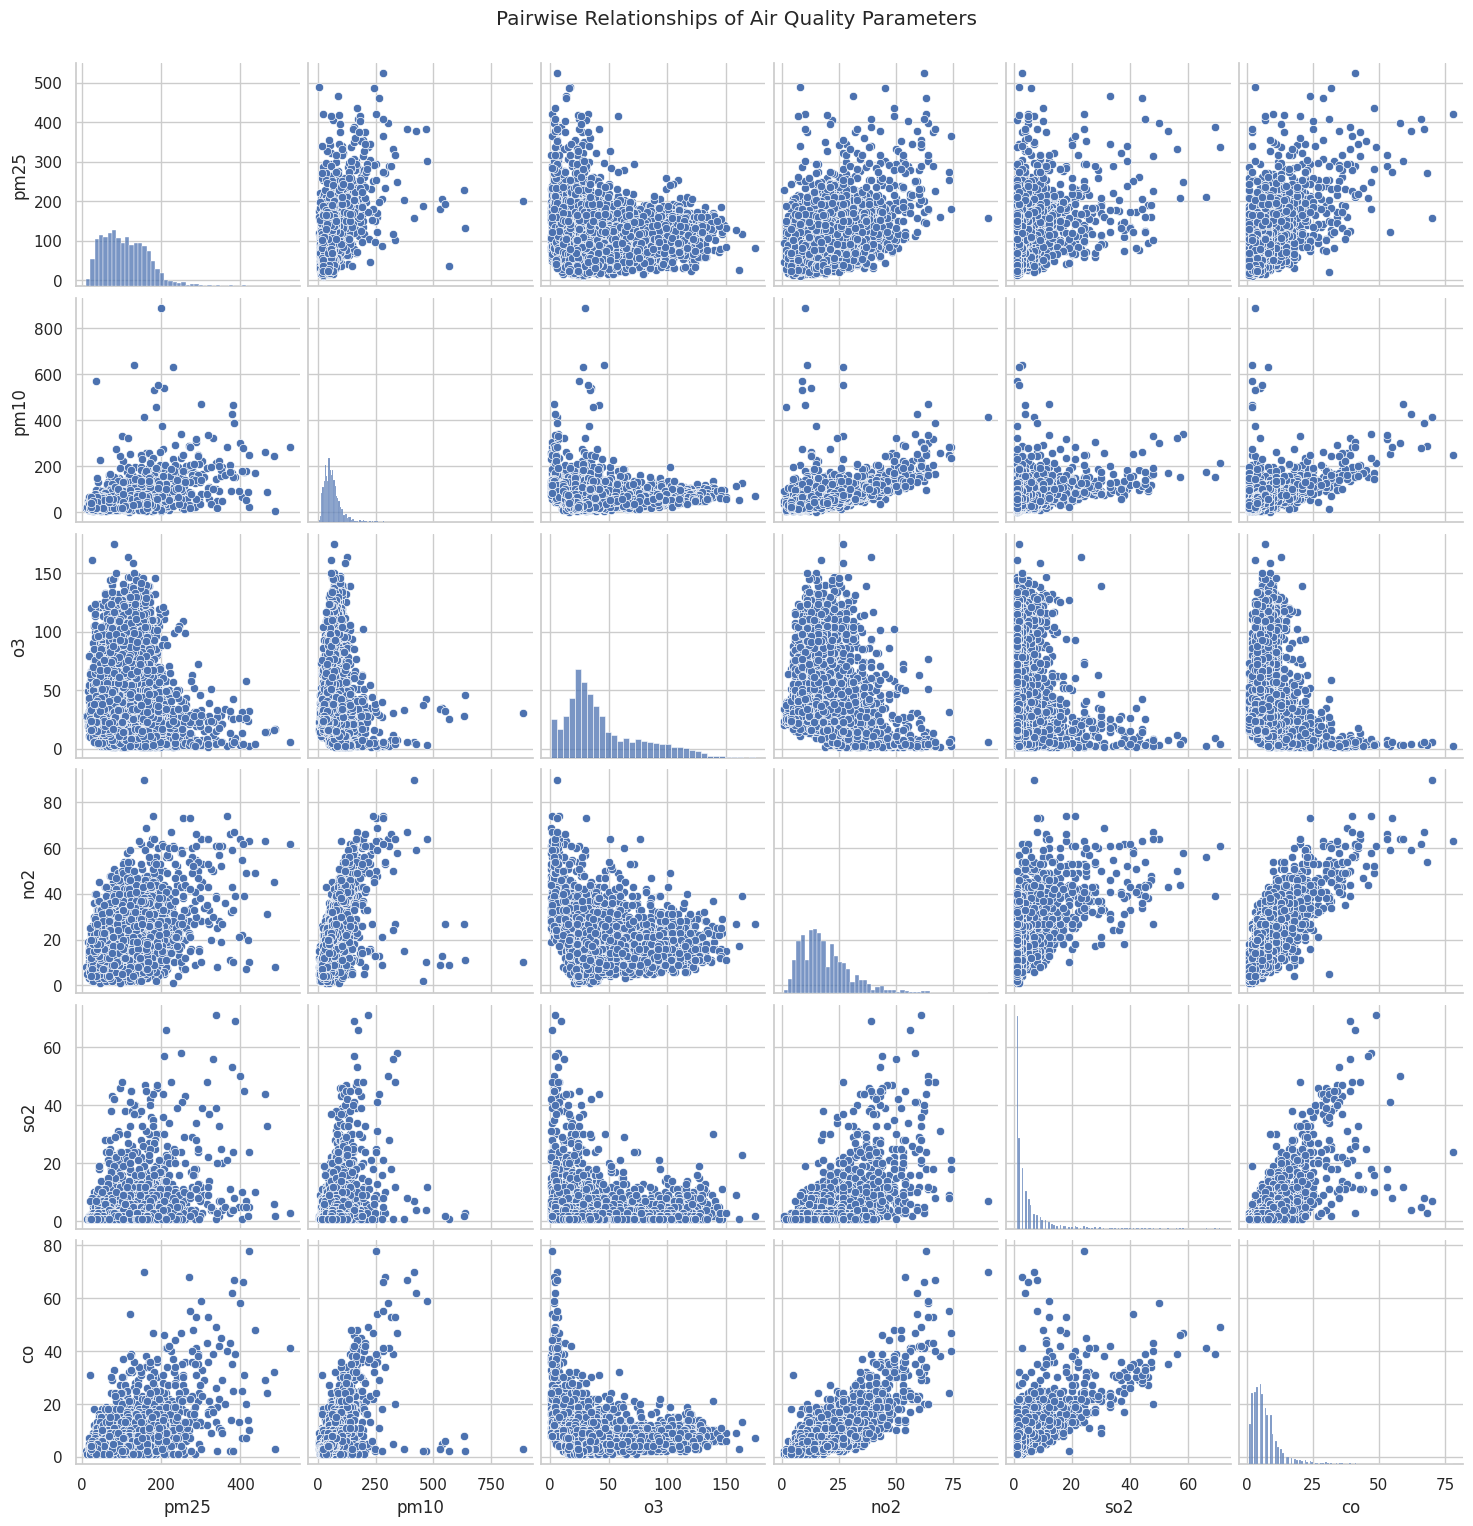

In [37]:
# pair plots

sns.pairplot(df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']])
plt.suptitle('Pairwise Relationships of Air Quality Parameters', y=1.02)
plt.show()

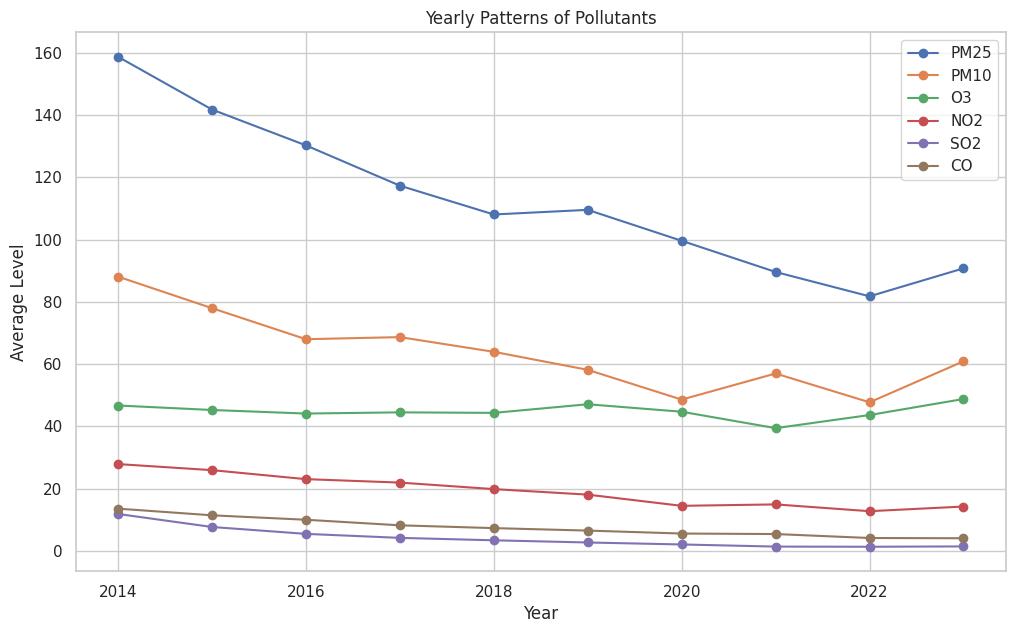

In [38]:
# Yearly Patterns of Pollutants

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/2023Fall/DV/beijing-air-quality.csv')

# Preprocessing
data['date'] = pd.to_datetime(data['date'])
data.columns = data.columns.str.strip()

# Pollutants
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
data[pollutants] = data[pollutants].apply(pd.to_numeric, errors='coerce')

# Extracting year and grouping by year
data['year'] = data['date'].dt.year
yearly_pollutants = data.groupby('year')[pollutants].mean()

# Plotting
plt.figure(figsize=(12, 7))
for pollutant in pollutants:
    plt.plot(yearly_pollutants.index, yearly_pollutants[pollutant], label=pollutant.upper(), marker='o')

plt.title('Yearly Patterns of Pollutants')
plt.xlabel('Year')
plt.ylabel('Average Level')
plt.legend()
plt.grid(True)
plt.show()

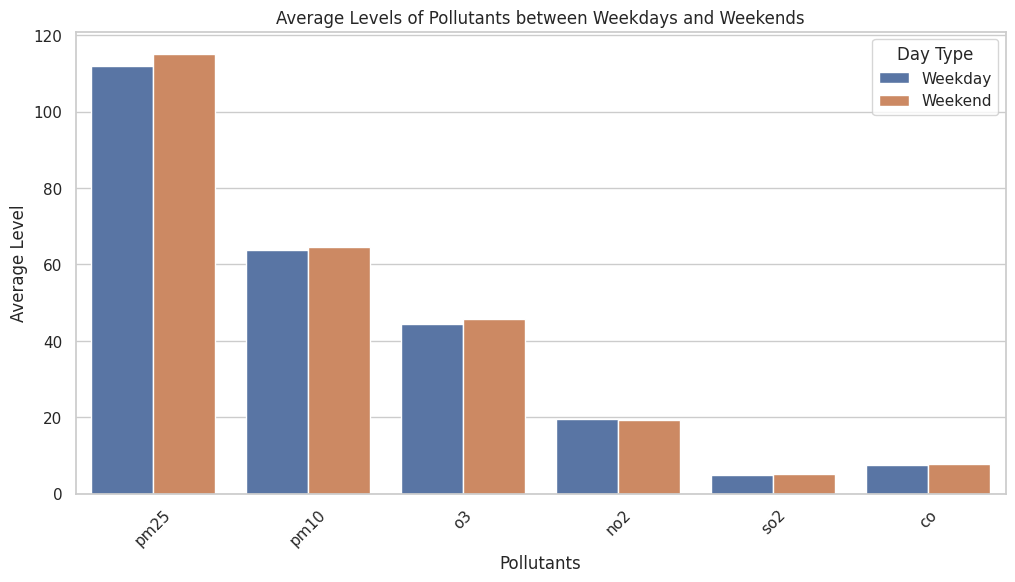

In [39]:
# Average Levels for Weekdays and Weekends:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/2023Fall/DV/beijing-air-quality.csv')

# Converting the date column to datetime and extracting day of the week
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek

# Classifying the days as Weekday (0-4) and Weekend (5-6)
data['day_type'] = data['day_of_week'].apply(lambda x: 'Weekend' if x > 4 else 'Weekday')

# Correcting column names and converting pollutant columns to numeric
data.columns = data.columns.str.strip()
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
data[pollutants] = data[pollutants].apply(pd.to_numeric, errors='coerce')

# Calculating average levels of pollutants for weekdays and weekends
average_pollutants = data.groupby('day_type')[pollutants].mean()

# Melting the dataframe for easier plotting
melted_data = average_pollutants.reset_index().melt(id_vars='day_type', var_name='Pollutant', value_name='Average Level')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Pollutant', y='Average Level', hue='day_type', data=melted_data)
plt.title('Average Levels of Pollutants between Weekdays and Weekends')
plt.ylabel('Average Level')
plt.xlabel('Pollutants')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.show()

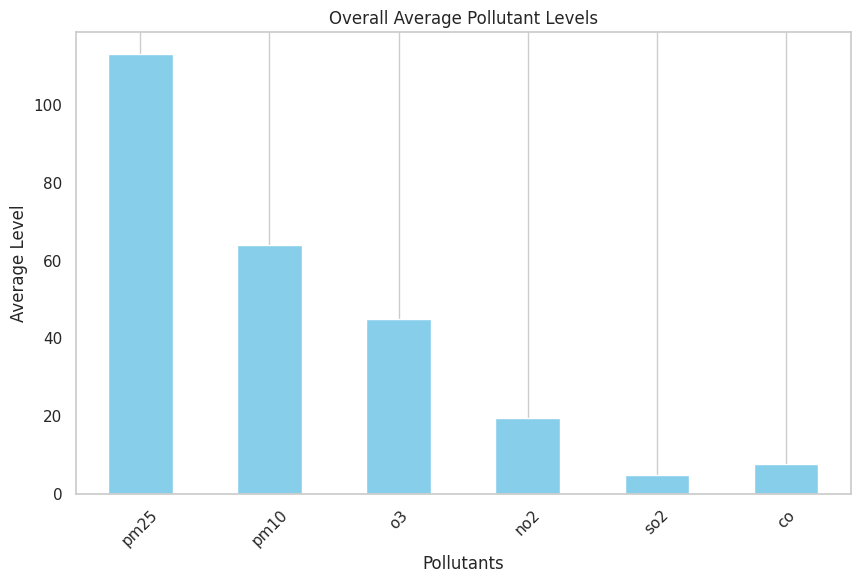

In [40]:
# Overall Average Pollutant Levels
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/2023Fall/DV/beijing-air-quality.csv')

# Preprocessing
data.columns = data.columns.str.strip()
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
data[pollutants] = data[pollutants].apply(pd.to_numeric, errors='coerce')

# Calculating the overall average levels of each pollutant
overall_average_pollutants = data[pollutants].mean()

# Plotting
plt.figure(figsize=(10, 6))
overall_average_pollutants.plot(kind='bar', color='skyblue')

plt.title('Overall Average Pollutant Levels')
plt.xlabel('Pollutants')
plt.ylabel('Average Level')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()